                         Timestamp  ... What motivates you to exercise?         (Please select all that applies )
0  2019/07/03 11:48:07 PM GMT+5:30  ...  I'm sorry ... I'm not really interested in exe...                       
1  2019/07/03 11:51:22 PM GMT+5:30  ...  I want to be fit;I want to be flexible;I want ...                       
2  2019/07/03 11:56:28 PM GMT+5:30  ...                                   I want to be fit                       
3   2019/07/04 5:43:35 AM GMT+5:30  ...             I want to be fit;I want to lose weight                       
4   2019/07/04 5:44:29 AM GMT+5:30  ...                                   I want to be fit                       

[5 rows x 18 columns]
Timestamp                                                                                                                0
Your name                                                                                                                0
Your gender                                    

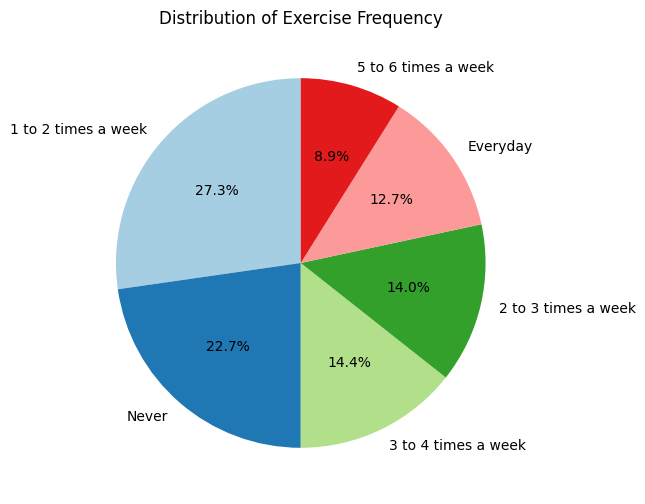

In [2]:
import pandas as pd

# 加载数据集
data = pd.read_csv('健康咨询客户数据集.csv')

# 查看表结构基本信息
print(data.head())

# 显示每一列的空缺值数量
print(data.isnull().sum())

# 删除含有缺失值的行
data_cleaned = data.dropna()

# 转换 'Your age' 列的数据类型为整数类型，并处理异常值
data_cleaned.loc[:, 'Your age'] = pd.to_numeric(data_cleaned['Your age'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['Your age'])
data_cleaned = data_cleaned[data_cleaned['Your age'] >= 0]
data_cleaned.loc[:, 'Your age'] = data_cleaned['Your age'].astype(int)

print(data_cleaned['Your age'].dtype)

# 检查和删除重复值
duplicates_removed = data_cleaned.duplicated().sum()
data_cleaned = data_cleaned.drop_duplicates()

print(f"Removed {duplicates_removed} duplicate rows")

from sklearn.preprocessing import LabelEncoder

# 归一化 'How do you describe your current level of fitness ?' 列
label_encoder = LabelEncoder()
data_cleaned['How do you describe your current level of fitness ?'] = label_encoder.fit_transform(data_cleaned['How do you describe your current level of fitness ?'])

print(data_cleaned['How do you describe your current level of fitness ?'].unique())

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 去掉列名中的空格
data.columns = data.columns.str.strip()
# 显示数据集的列名
print(data.columns)

# 删除包含缺失值的行
data_cleaned = data.dropna(subset=['How often do you exercise?'])

# 统计不同健身频率的分布情况
exercise_frequency_counts = data_cleaned['How often do you exercise?'].value_counts()

# 绘制饼图
plt.figure(figsize=(10, 6))
exercise_frequency_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Exercise Frequency')
plt.ylabel('')
plt.show()

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 填充缺失值
data_filled = data.apply(lambda x: x.fillna(x.mode()[0]))

# 划分数据（测试集占比20%）
train_data, test_data = train_test_split(data_filled,test_size=0.2, random_state=42)

# 保存处理后的数据
cleaned_file_path = '2.1.5_cleaned_data.csv'
data_filled.to_csv(cleaned_file_path, index=False)
